In [2]:
import pandas as pd
from sklearn.linear_model import LassoCV,Lasso,LinearRegression
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
#lecturay transposicion de datos
datos0=pd.read_csv('JPT-normalised.csv',sep=',',header=0)
datos0.set_index('TargetID',inplace=True)
datos=datos0.transpose()
datos.head()

TargetID,GI_10047089-S,GI_10047091-S,GI_10047093-S,GI_10047099-S,GI_10047103-S,GI_10047105-S,GI_10047121-S,GI_10047123-S,GI_10047133-A,GI_10047133-I,...,hmm9715-S,hmm9738-S,hmm974-S,hmm9750-S,hmm9917-S,hmm9988-S,lysA,pheA,thrB,trpF
NA18940,5.905903,6.379038,9.657113,8.473101,11.816954,6.284496,5.939293,9.391122,5.984162,6.251393,...,6.600314,5.988158,6.182035,6.030428,6.526358,6.148940,6.273033,6.062725,5.980462,6.183564
NA18942,5.862802,6.237231,9.757061,7.669087,11.889107,6.326269,5.979990,9.384830,5.988489,6.297775,...,6.839432,5.984205,6.201975,6.348412,6.734012,6.072930,6.256514,6.029299,5.972327,6.166144
NA18943,5.895430,6.382622,9.773869,8.109965,11.915487,6.357429,5.881434,9.523576,5.770766,6.287376,...,6.826710,6.065642,6.132751,6.262130,6.625256,6.087863,6.250124,6.034061,5.949516,6.165167
NA18944,5.920447,6.334972,9.768903,7.769878,11.647572,6.265941,6.041597,9.252602,5.857453,6.231731,...,6.683682,6.021442,6.162427,6.049412,6.592855,6.104832,6.332426,6.052687,5.987154,6.185012
NA18945,5.877090,6.399811,9.659167,8.341577,11.747721,6.198131,5.969111,9.290656,5.947048,6.359190,...,6.730981,6.099921,6.063123,6.097134,6.627950,6.058605,6.286986,6.045043,5.978261,6.210662


In [5]:
#p>>n 
datos.shape

(45, 47293)

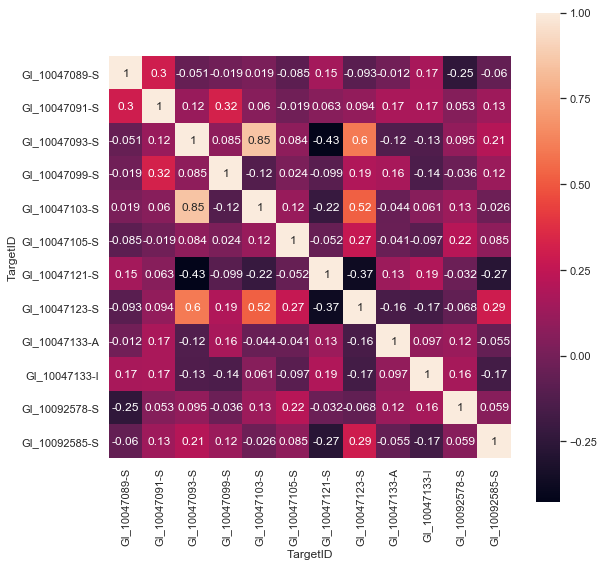

In [6]:
#muy importante ver el grado de correlación entre covaribale pero 
#de manera grafica es imposible
sns.set(rc={'figure.figsize':(9,9)})
sns.heatmap(datos.iloc[:,:12].corr(), square=True, annot=True)

In [7]:
y=datos['GI_21361147-S']
X=datos.drop(['GI_21361147-S'], axis=1)

In [22]:
#vemos el desempeño  
model0 = Lasso(alpha=0.020)
model0.fit(X,y)
model0.predict(X)
model0.score(X,y)

0.8526037734822277

In [23]:
a0=[1 for i in model0.coef_ if i!=0]
print('Coeficientes distintos a cero',sum(a0))
print('Coeficientes totales',len(model0.coef_))

Coeficientes distintos a cero 25
Coeficientes totales 47292


In [ ]:
#un k-fold cross validation con k=5, porbamos 100 alphas mucho
model1 = LassoCV(cv=5,n_alphas=100,max_iter=5000,n_jobs=-1).fit(X, y)
model1.predict(X)
model1.score(X,y)

In [26]:
a=[1 for i in model1.coef_ if i!=0]
print('Coeficientes distintos a cero',sum(a))
print('Coeficientes totales',len(model1.coef_))

Coeficientes distintos a cero 43
Coeficientes totales 47292


In [27]:
print("el parametro alpha de regularizacion")
print(model1.alpha_)

el parametro alpha de regularizacion
0.0012236917876769576
